<a href="https://colab.research.google.com/github/starsbro/Hello-World/blob/main/Bayesian_lab_rainfall_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

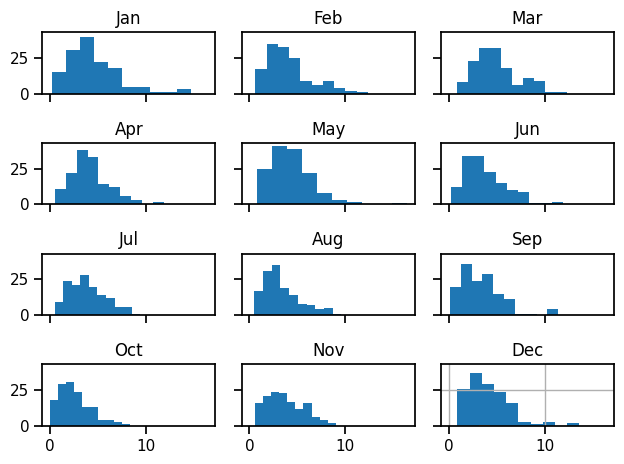

In [5]:
#1. The garma distribuiton

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

#2. Dataset: Nashville Precipitation
precip = pd.read_table("/content/nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

#3. Data Cleaning
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

#4. Exploration
precip_mean = precip.mean()
precip_mean
precip_var = precip.var()
precip_var

precip.Apr

precip.Apr.hist(density=True, bins=30)

##5. Modeling:

from pymc import Model, Uniform, Gamma

with Model() as rainfall_model:
    ualpha = Uniform('ualpha', lower=0, upper=15)
    ubeta = Uniform('ubeta', lower=0, upper=15)

with rainfall_model:
    april_like = Gamma('april_like', alpha=ualpha, beta=ubeta, observed=precip.Apr)




This is the simulation part (the probabilistic program that yields the best values for parameters 𝛼 and 𝛽). Be patient:

In [6]:
#6. This is the simulation part
from pymc import fit

with rainfall_model:
    rainfall_trace = fit(random_seed=RANDOM_SEED).sample(1000)



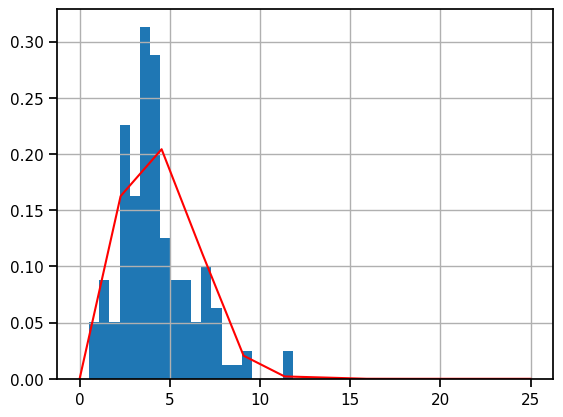

In [15]:
from scipy.stats.distributions import gamma

ualpha_posterior_mean = precip_mean**2/precip_var
ubeta_posterior_mean = precip_var/precip_mean

#print(ualpha_posterior_mean)
#print(ubeta_posterior_mean)

x = np.linspace(0, 25, len(ualpha_posterior_mean))

precip.Apr.hist(density=True, bins=20)
#plt.plot(np.linspace(0, 25), gamma.pdf(np.linspace(0, 25), ualpha_posterior_mean, ubeta_posterior_mean))
plt.plot(x, gamma.pdf(x, ualpha_posterior_mean, ubeta_posterior_mean), 'r-', label='Gamma PDF')

